# Workshop 1 NetworkX

Social Network Science Workshop - SNA, with python NetworkX and Pandas

*Luis Gabriel Moreno Sandoval - morenoluis@javeriana.edu.co*


## Section 1:

This part is an exploratory analysis of the advantages of managing SNA social networks with the Python NetworkX library and the ease of integration with our Data science projects.

Library documentation: <a>https://networkx.github.io/</a>


In [1]:
import networkx as nx
G = nx.Graph()

In [2]:
# basic add nodes
G.add_node(1)
G.add_nodes_from([2, 3])

In [3]:
print('Nodes :', G.nodes)

Nodes : [1, 2, 3]


In [4]:
# add a group of nodes at once
H = nx.path_graph(10)
G.add_nodes_from(H)

In [5]:
print('H Nodes :', H.nodes)
print('G Nodes :', G.nodes)

H Nodes : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
G Nodes : [1, 2, 3, 0, 4, 5, 6, 7, 8, 9]


In [6]:
# add another graph itself as a node
G.add_node(H)

In [7]:
G.add_node('gabriel')

In [8]:
print('G Nodes :', G.nodes)

G Nodes : [1, 2, 3, 0, 4, 5, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x7fa6e8264810>, 'gabriel']


In [ ]:
# obj_1 = {'name':'Gabriel', 'age':37}
# G.add_node(obj_1)

In [9]:
G.clear_edges()
G.edges

EdgeView([])

In [10]:
# add edges using similar methods
G.add_edge(1, 2)
print('Edges #1:', G.edges)
e = (2, 3)
e_2 = [2, 3]
print('e', e)
print('e_2', e_2)
G.add_edge(*e)
print('Edges #2.1:', G.edges)
G.add_edges_from([(1, 2), (1, 3)])
print('Edges #3:', G.edges)
G.add_edges_from(H.edges())
print('Edges #4:', G.edges)

Edges #1: [(1, 2)]
e (2, 3)
e_2 [2, 3]
Edges #2.1: [(1, 2), (2, 3)]
Edges #3: [(1, 2), (1, 3), (2, 3)]
Edges #4: [(1, 2), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


In [11]:
G.add_edge(1, 'gabriel')
print('Edges #5:', G.edges)

Edges #5: [(1, 2), (1, 3), (1, 0), (1, 'gabriel'), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


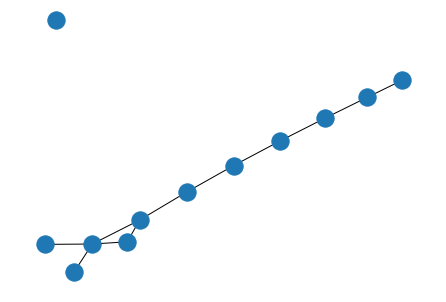

In [12]:
nx.draw(G)

In [13]:
print('G Edges :', G.edges)

G Edges : [(1, 2), (1, 3), (1, 0), (1, 'gabriel'), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


In [14]:
# can also remove or clear
G.remove_node(H)
print('Nodes :', G.nodes)

Nodes : [1, 2, 3, 0, 4, 5, 6, 7, 8, 9, 'gabriel']


In [15]:
G.clear()
print('Nodes :', G.nodes)
print('Edges :', G.edges)

Nodes : []
Edges : []


In [16]:
# repeats are ignored
G.add_edges_from([(1,2),(1,3)])
print('Nodes #1:', G.nodes)
G.add_node(1)
print('Nodes #2:', G.nodes)
G.add_edge(1,2)
print('Nodes #3:', G.nodes)
G.add_node('spam')       # adds node "spam"
print('Nodes #4:', G.nodes)
G.add_nodes_from('spam') # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_nodes_from('1234') 
print('Nodes #5:', G.nodes)

Nodes #1: [1, 2, 3]
Nodes #2: [1, 2, 3]
Nodes #3: [1, 2, 3]
Nodes #4: [1, 2, 3, 'spam']
Nodes #5: [1, 2, 3, 'spam', 's', 'p', 'a', 'm', '1', '2', '3', '4']


In [17]:
G.add_nodes_from('spam.,!')
print('Nodes #6:', G.nodes)

Nodes #6: [1, 2, 3, 'spam', 's', 'p', 'a', 'm', '1', '2', '3', '4', '.', ',', '!']


In [18]:
print('Nodes :', G.nodes)
print('Edges :', G.edges)

Nodes : [1, 2, 3, 'spam', 's', 'p', 'a', 'm', '1', '2', '3', '4', '.', ',', '!']
Edges : [(1, 2), (1, 3)]


In [19]:
# get the number of nodes and edges
G.number_of_nodes(), G.number_of_edges()

(15, 2)

In [20]:
# set an attribute of an edge
# G.add_edge(1,3)
G[1][3]['color'] = 'blue'

In [21]:
print(G[1][3]['color'])

blue


In [22]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

for n, nbrs in FG.adjacency():
    #print(n, nbrs)
    for nbr, eattr in nbrs.items():
        data = eattr['weight']
        if data < 0.5: print('(%d, %d, %.3f)' % (n, nbr, data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [23]:
FG.adjacency()

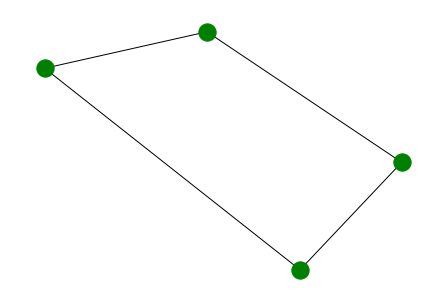

In [24]:
nx.draw(FG, node_color='green')

In [25]:
# graph attribte
G = nx.Graph(day='Friday')
G.graph

{'day': 'Friday'}

In [26]:
# modifying an attribute
G.graph['day'] = 'Monday'
G.graph

{'day': 'Monday'}

In [ ]:
G.nodes, G.edges

(NodeView(()), EdgeView([]))

In [27]:
# node attributes
G.add_node(5)
G.add_node(1, time='5pm')
G.add_node(7, day='Monday', time='12pm')
print('Nodes 1:', G.nodes)
G.add_nodes_from([3, 4], time='2pm')
print('Nodes 2:', G.nodes)
print(G.nodes(data=True))
print('Nodes 3:', G.nodes)

Nodes 1: [5, 1, 7]
Nodes 2: [5, 1, 7, 3, 4]
[(5, {}), (1, {'time': '5pm'}), (7, {'day': 'Monday', 'time': '12pm'}), (3, {'time': '2pm'}), (4, {'time': '2pm'})]
Nodes 3: [5, 1, 7, 3, 4]


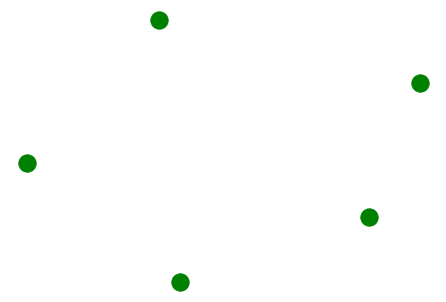

In [ ]:
nx.draw(G, node_color='green')

In [28]:
G.clear_edges()

In [29]:
# edge attributes (weight is a special numeric attribute)
G.add_edge(1, 2, weight=4.7)
print(G.edges(data=True))
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2 ,{'color': 'blue'}), (2, 3, {'weight' :8})])
G[1][2]['weight'] = 4.8
print(G.edges(data=True))

[(1, 2, {'weight': 4.7})]
[(5, 4, {'color': 'red'}), (1, 2, {'weight': 4.8, 'color': 'blue'}), (3, 4, {'color': 'red'}), (3, 2, {'weight': 8})]


In [30]:
print('Nodos Data : ', G.nodes(data=True))
print('Edges Data :', G.edges(data=True))

Nodos Data :  [(5, {}), (1, {'time': '5pm'}), (7, {'day': 'Monday', 'time': '12pm'}), (3, {'time': '2pm'}), (4, {'time': '2pm'}), (2, {})]
Edges Data : [(5, 4, {'color': 'red'}), (1, 2, {'weight': 4.8, 'color': 'blue'}), (3, 4, {'color': 'red'}), (3, 2, {'weight': 8})]


In [31]:
print('Nodes :', G.nodes)
print('Edges :', G.edges)

Nodes : [5, 1, 7, 3, 4, 2]
Edges : [(5, 4), (1, 2), (3, 4), (3, 2)]


In [32]:
# directed graph
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2 ,0.6), (3, 1, 0.85), (3, 4, 1.4), (5, 3, 1.2)])
print('all_degree 1:', DG.degree(1, weight='weight'))
print('all_degree 3:', DG.degree(3, weight='weight'))
print('out_degree 1:', DG.out_degree(1, weight='weight'))
print('in_degree 1:', DG.in_degree(1, weight='weight'))
print('out_degree 3:', DG.out_degree(3, weight='weight'))
print('in_degree 3:', DG.in_degree(3, weight='weight'))

all_degree 1: 1.45
all_degree 3: 3.45
out_degree 1: 0.6
in_degree 1: 0.85
out_degree 3: 2.25
in_degree 3: 1.2


In [ ]:
DC(1) = 2, 1
DC(2) = 0
DC(3) = 2
out_dg(1) = 1



SyntaxError: ignored

In [33]:
for item_n in DG.nodes:
  print(item_n, '-' * 100)
  print('all_degree', DG.degree(item_n, weight='weight'))
  print('out_degree', DG.out_degree(item_n, weight='weight'))
  print('in_degree', DG.in_degree(item_n, weight='weight'))

1 ----------------------------------------------------------------------------------------------------
all_degree 1.45
out_degree 0.6
in_degree 0.85
2 ----------------------------------------------------------------------------------------------------
all_degree 0.6
out_degree 0
in_degree 0.6
3 ----------------------------------------------------------------------------------------------------
all_degree 3.45
out_degree 2.25
in_degree 1.2
4 ----------------------------------------------------------------------------------------------------
all_degree 1.4
out_degree 0
in_degree 1.4
5 ----------------------------------------------------------------------------------------------------
all_degree 1.2
out_degree 1.2
in_degree 0


In [34]:
print('all_degree', DG.degree(1, weight='weight'))

all_degree 1.45


In [35]:
for item in DG.successors(3):
  print(item)

1
4


In [36]:
for item in DG.predecessors(3):
    print(item)

5


In [37]:
# convert to undirected graph
H = nx.Graph(G)

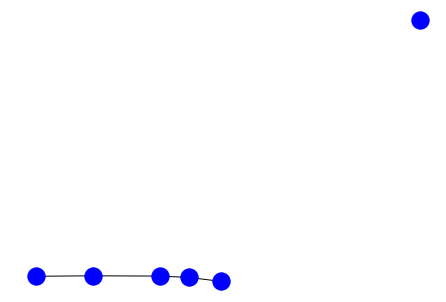

In [38]:
# basic graph drawing capability
# %matplotlib inline
# import matplotlib.pyplot as plt
nx.draw(G, node_color='blue')

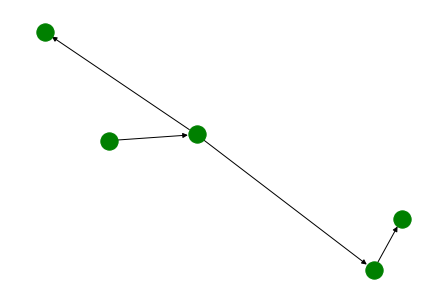

In [39]:
nx.draw(DG, node_color='green')

## Section 2:

How to weave a network with data obtained from external sources with Pandas.


In [40]:
%matplotlib inline

import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
# Ignore matplotlib warnings
import warnings
# warnings.filterwarnings("ignore")

In [41]:
df = pd.read_excel("Cuentas de Twitter.xlsx")
df.head

<bound method NDFrame.head of               NodeA              NodeB  TypeA  TypeB  W
0   gabrielmoreno10    liliana_pantoja      1      0  3
1   gabrielmoreno10       VickyDavilaH      1      0  1
2   gabrielmoreno10       MAndreaNieto      1      0  2
3   gabrielmoreno10    fabianpallaresj      1      1  2
4            sperez             daniel      0      1  5
..              ...                ...    ...    ... ..
62  fabianpallaresj    beatriz_apinzon      1      0  4
63  fabianpallaresj       nicolas_mora      1      1  3
64   diegoRamirez36            messi10      1      1  1
65   diegoRamirez36  cristiano_ronaldo      1      1  1
66    gardeazabal48         camigomez_      1      0  5

[67 rows x 5 columns]>

In [ ]:
# df = pd.read_csv("CuentasTwitter_V3.csv", sep=";")
# df.head

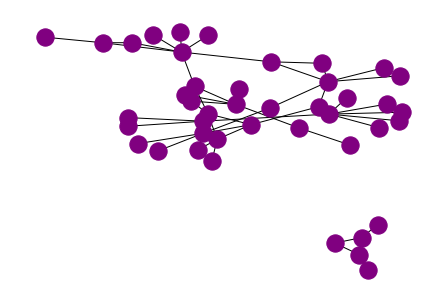

In [44]:
g = nx.from_pandas_edgelist(df, source='NodeA', target='NodeB') 
nx.draw(g, node_color='purple')

In [45]:
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 592 kB 2.0 MB/s 
     |████████████████████████████████| 1.6 MB 58.6 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.0-py3-none-any.whl size=600250 sha256=c2c78bbe197a0b890b4fd9e97a443f4c34cad1c31edb8924576f1fc38ab5c4e1
  Stored in directory: /root/.cache/pip/wheels/57/74/32/e404e0d76fbb2dc4e3791b821cfae6a69c1a6677ded99dc8b7
Successfully built pyvis


In [46]:
from pyvis import network as net
from IPython.core.display import display, HTML
g_vis=net.Network(height='600px', width='100%',heading='Twitter accounts SNA 2022-10-01')
g_vis.from_nx(g)
g_vis.show('Twitter_Accounts.html')
display(HTML('Twitter_Accounts.html'))

## Section 3:

How can we graphically improve my graph?

In [47]:
import matplotlib.pyplot as plt
from operator import itemgetter 

plt.figure(figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [49]:
# 1. Create the graph
g = nx.from_pandas_edgelist(df, source='NodeA', target='NodeB') 

In [53]:
# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

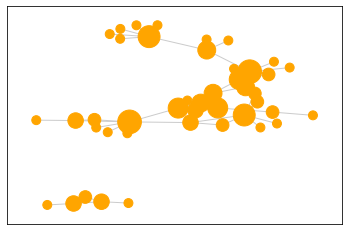

In [54]:
# 3. Draw the parts we want
people_size = [g.degree(node) * 80 for node in g.nodes]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=g.nodes, 
                       node_size=people_size, # a LIST of sizes, based on g.degree
                       node_color='orange')

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

[{'person': 'gabrielmoreno10', 'value': 4}, {'person': 'liliana_pantoja', 'value': 6}, {'person': 'VickyDavilaH', 'value': 1}, {'person': 'MAndreaNieto', 'value': 1}, {'person': 'fabianpallaresj', 'value': 7}, {'person': 'sperez', 'value': 5}, {'person': 'daniel', 'value': 2}, {'person': 'diegoRamirez36', 'value': 6}, {'person': 'alejandram_', 'value': 1}, {'person': 'FelipeG1609', 'value': 2}, {'person': 'soler_camargo', 'value': 3}, {'person': 'camigomez_', 'value': 7}, {'person': 'bernardo_pinzon', 'value': 4}, {'person': 'carlos_ramirez', 'value': 4}, {'person': 'marimedx', 'value': 3}, {'person': 'mora_laura', 'value': 5}, {'person': 'julian_rodriguez', 'value': 4}, {'person': 'sreina', 'value': 5}, {'person': 'danielarubio123', 'value': 2}, {'person': 'DavidH83', 'value': 3}, {'person': 'daniel.mejia', 'value': 2}, {'person': 'diegobarreto', 'value': 3}, {'person': 'kmo0626', 'value': 3}, {'person': 'petrosky', 'value': 1}, {'person': 'RosanaFerrero', 'value': 1}, {'person': 'ARM

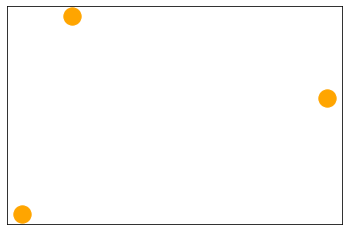

In [55]:
# 3.1 Draw POPULAR PEOPLE
popular_people = [{'person':person, 'value':g.degree(person)} for person in g.nodes]
print(popular_people)
list_central = sorted(popular_people, key=itemgetter('value'), reverse=True)
print(sorted(popular_people, key=itemgetter('value'), reverse=True))
list_orange = [list_central[0]['person'],list_central[1]['person'],list_central[2]['person']]
print(list_orange)
nx.draw_networkx_nodes(g, layout, nodelist=list_orange, node_color='orange')

{'gabrielmoreno10': Text(0.07621920732486577, 0.5004131054131894, 'gabrielmoreno10'),
 'sperez': Text(0.10978186191042565, -0.059870087248259006, 'sperez'),
 'diegoRamirez36': Text(0.19131387614029688, -0.12869242906044395, 'diegoRamirez36'),
 'FelipeG1609': Text(0.12491157439236701, -0.2259849881138695, 'FelipeG1609'),
 'soler_camargo': Text(-0.32669154797208455, -0.18235330308872455, 'soler_camargo'),
 'bernardo_pinzon': Text(0.19528100772434184, 0.14455268540795657, 'bernardo_pinzon'),
 'marimedx': Text(0.026255187704225875, -0.2019276419406822, 'marimedx'),
 'fabianpallaresj': Text(0.20802305294719228, 0.2908743217321862, 'fabianpallaresj'),
 'camigomez_': Text(-0.16100638816398657, -0.195356534155059, 'camigomez_'),
 'carlos_ramirez': Text(0.09558874231905, 0.08203758358851049, 'carlos_ramirez'),
 'julian_rodriguez': Text(0.05752215577327418, -0.013277677206587964, 'julian_rodriguez'),
 'danielarubio123': Text(-0.29688590324485065, -0.9232124415749752, 'danielarubio123'),
 'DavidH

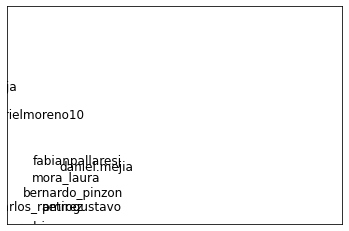

In [56]:
# 3.2 Draw Labels
people = list(df['NodeA'].unique())
node_labels = dict(zip(people, people))
nx.draw_networkx_labels(g, layout, labels=node_labels)

Text(0.5, 1.0, 'Social Network Twitter Class')

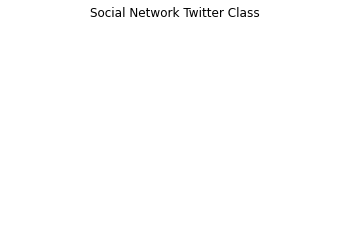

In [57]:
# 4. Turn off the axis because I know you don't want it
plt.axis('off')
plt.title("Social Network Twitter Class")

In [58]:
# 5. Tell matplotlib to show it
plt.show()

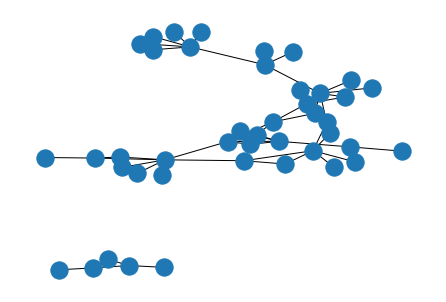

In [59]:
nx.draw(g, layout)